In [1]:
import requests, zipfile, io, os, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Use this function to download the dataset directly form the link

In [2]:

# def extract_data(url):
#     response=requests.get(url)
#     zfile=zipfile.ZipFile(io.BytesIO(response.content))
#     try:
#         os.mkdir("files")
#     except:
#         pass
#     zfile.extractall("files")
#     print(f"Data extracted successfully")
# url="https://archive-beta.ics.uci.edu/static/public/791/metropt+3+dataset.zip"
# extract_data(url)

In [3]:
data = pd.read_csv("files/MetroPT3(AirCompressor).csv",index_col=["Unnamed: 0"])

<p style="color:rgb(75,120,25); font-size:30px; font-family:monospace; font-weight:1000;">Data Understanding</p>

In [4]:
data.shape

(1516948, 16)

In [5]:
data.sample(5)

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
12698020,2020-07-28 10:24:30,-0.012,8.688,8.676,-0.018,8.692,62.750,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3056600,2020-03-13 08:25:43,-0.016,9.856,9.846,-0.026,9.858,67.425,3.7025,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
7853460,2020-05-21 12:23:38,9.128,8.694,-0.014,-0.018,8.692,63.300,5.9050,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
10253320,2020-06-23 13:49:14,8.390,8.506,-0.014,-0.014,8.506,65.150,5.5750,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
8064600,2020-05-25 04:06:53,-0.012,9.352,9.342,-0.022,9.354,65.950,3.8375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [6]:
data.columns

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516948 entries, 0 to 15169470
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   timestamp        1516948 non-null  object 
 1   TP2              1516948 non-null  float64
 2   TP3              1516948 non-null  float64
 3   H1               1516948 non-null  float64
 4   DV_pressure      1516948 non-null  float64
 5   Reservoirs       1516948 non-null  float64
 6   Oil_temperature  1516948 non-null  float64
 7   Motor_current    1516948 non-null  float64
 8   COMP             1516948 non-null  float64
 9   DV_eletric       1516948 non-null  float64
 10  Towers           1516948 non-null  float64
 11  MPG              1516948 non-null  float64
 12  LPS              1516948 non-null  float64
 13  Pressure_switch  1516948 non-null  float64
 14  Oil_level        1516948 non-null  float64
 15  Caudal_impulses  1516948 non-null  float64
dtypes: float64(15), object

In [8]:
data.isna().sum()

timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

In [9]:
data.describe()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


<AxesSubplot: >

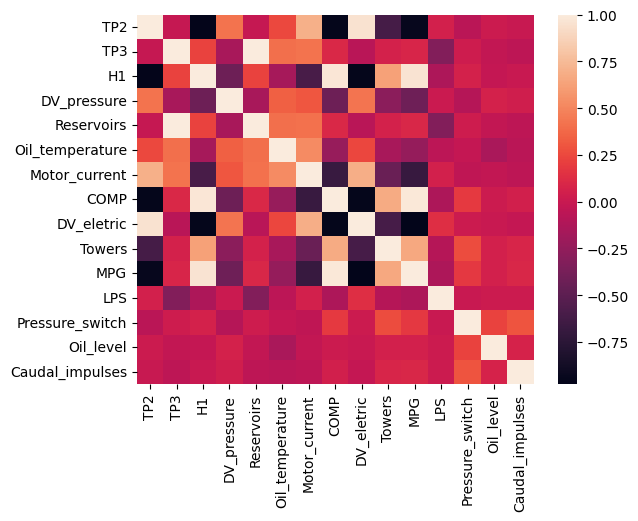

In [10]:
sns.heatmap(data.corr(numeric_only=True))

<p style="color:rgb(0,250,250); font-size:30px; font-family:monospace; font-weight:1000;">Data preprocessing</p>

In [12]:
data.set_index(["timestamp"],inplace=True)

<p style="color:rgb(175,0,25); font-size:30px; font-family:monospace; font-weight:1000;">Data Visualisation</p>

In [13]:
data.columns

Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
       'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')

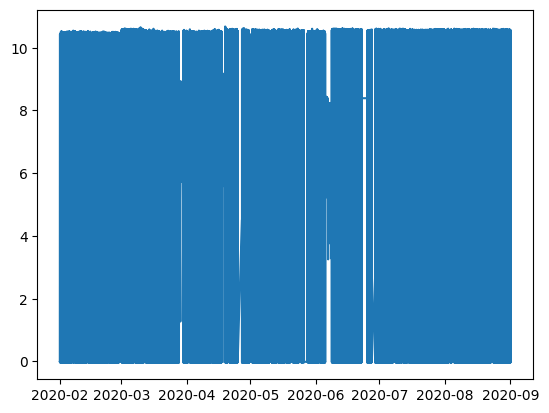

In [17]:
plt.plot(pd.to_datetime(data.index),data["TP2"])

<p style="color:rgb(75,120,250); font-size:30px; font-family:monospace; font-weight:1000;">Model Building</p>